In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
#If you do not want to use functions then you can do the following

In [38]:
R=100
u=1.0
V=2.0
dt=0.01
prey_pos = np.array([R, 0], dtype=np.float64)  # Start prey at (R, 0)
predator_pos = np.array([0, 0], dtype=np.float64)  # Start predator at origin
positions = [(prey_pos.copy(), predator_pos.copy())]
t = 0.0
distance=R

In [39]:
while distance>V*dt:
        # Calculate prey's new position (circular motion)
        theta = u * t / R  # Angle based on time
        prey_pos = np.array([R * np.cos(theta), R * np.sin(theta)])
        
        # Calculate predator's direction vector
        direction = prey_pos - predator_pos
        distance = np.linalg.norm(direction)
        
        # Safety check to prevent infinite loops
        if t > 1000:  # Max simulation time (adjust as needed)
            raise RuntimeError("Simulation did not converge - predator may never catch prey")
        
        # Normalize direction and move predator
        predator_pos += (direction / distance) * V * dt
        
        # Store positions
        positions.append((prey_pos.copy(), predator_pos.copy()))
        t += dt

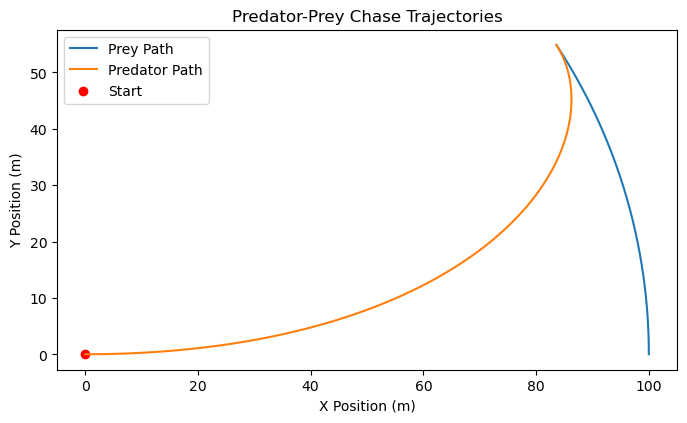

In [40]:
prey_x, prey_y = zip(*[p[0] for p in positions])
pred_x, pred_y = zip(*[p[1] for p in positions])
plt.figure(figsize=(8, 8))
plt.plot(prey_x, prey_y, label='Prey Path')
plt.plot(pred_x, pred_y, label='Predator Path')
plt.scatter([0], [0], c='red', label='Start')
plt.gca().set_aspect('equal')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.legend()
plt.title('Predator-Prey Chase Trajectories')
plt.show()

In [41]:
#Using functions gives you advantage of haveing better structure code and ability to call for additional calculations in a compact way

In [42]:
def simulate_chase(R=100, u=1.0, V=2.0, dt=0.01):
    """
    Simulate predator-prey chase where prey moves in a circle and predator chases directly.
    
    Parameters:
        R (float): Radius of prey's circular path (meters)
        u (float): Speed of prey (m/s)
        V (float): Speed of predator (m/s)
        dt (float): Time step for simulation (seconds)
        
    Returns:
        Tc (float): Time until capture (seconds)
        positions (list): List of (prey_pos, predator_pos) tuples over time
    """
    # Initial positions (explicitly as float arrays)
    prey_pos = np.array([R, 0], dtype=np.float64)  # Start prey at (R, 0)
    predator_pos = np.array([0, 0], dtype=np.float64)  # Start predator at origin
    
    positions = [(prey_pos.copy(), predator_pos.copy())]
    t = 0
    distance=R  # ADDED MANNUALY
    
 #   while True:
    while distance>V*dt:  # ADDED MANNUALY 
        # Calculate prey's new position (circular motion)
        theta = u * t / R  # Angle based on time
        prey_pos = np.array([R * np.cos(theta), R * np.sin(theta)])
        
        # Calculate predator's direction vector
        direction = prey_pos - predator_pos
        distance = np.linalg.norm(direction)
        
        # Check for capture with more robust condition
       # if distance < V * dt:  # Capture when predator can reach prey in one step
        #    return t, positions
        
        # Safety check to prevent infinite loops
        if t > 1000:  # Max simulation time (adjust as needed)
#            return t, positions
            raise RuntimeError("Simulation did not converge - predator may never catch prey")
        
        # Normalize direction and move predator
        predator_pos += (direction / distance) * V * dt
        
        # Store positions
        positions.append((prey_pos.copy(), predator_pos.copy()))
        t += dt

    return t, positions   

In [43]:
def plot_trajectory(positions):
    """Plot the trajectories of prey and predator"""
    prey_x, prey_y = zip(*[p[0] for p in positions])
    pred_x, pred_y = zip(*[p[1] for p in positions])
    
    plt.figure(figsize=(8, 8))
    plt.plot(prey_x, prey_y, label='Prey Path')
    plt.plot(pred_x, pred_y, label='Predator Path')
    plt.scatter([0], [0], c='red', label='Start')
    plt.gca().set_aspect('equal')
    plt.xlabel('X Position (m)')
    plt.ylabel('Y Position (m)')
    plt.legend()
    plt.title('Predator-Prey Chase Trajectories')
    plt.show()

def analyze_capture_time(u_range=(1.0, 1.9), num_points=20):
    """Analyze how capture time varies with prey speed"""
    u_values = np.linspace(u_range[0], u_range[1], num_points)
    Tc_values = []
    
    for u in u_values:
        Tc, _ = simulate_chase(u=u)
        Tc_values.append(Tc)
    
    plt.figure()
    plt.plot(u_values, Tc_values, 'o-')
    plt.xlabel('Prey Speed u (m/s)')
    plt.ylabel('Capture Time Tc (s)')
    plt.title('Capture Time vs Prey Speed')
    plt.grid(True)
    plt.show()

In [44]:
Tc, positions = simulate_chase()
print(f"Capture time: {Tc:.2f} seconds")

Capture time: 58.08 seconds


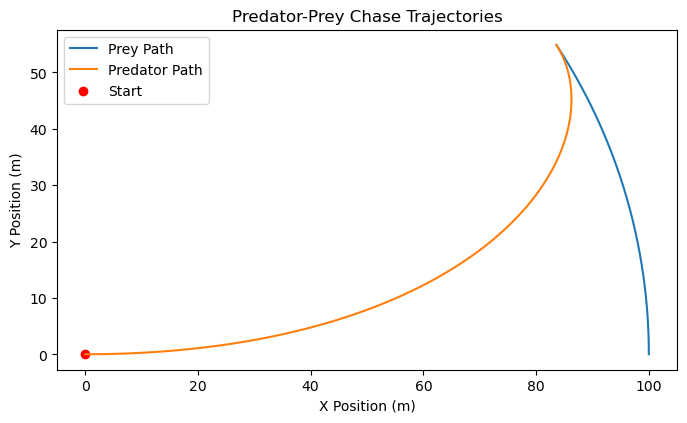

In [45]:
# Plot the trajectories
plot_trajectory(positions)
    



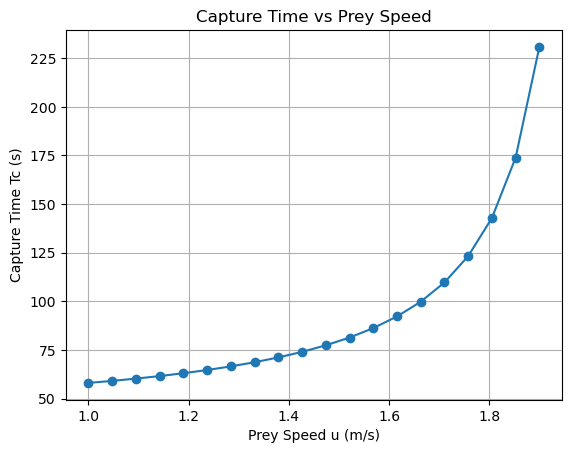

In [46]:
# Analyze how capture time varies with prey speed
analyze_capture_time()